In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
firesDF = pd.read_csv("/content/gdrive/My Drive/Big Data Analytics/Data/fires_raw.csv", low_memory=False) 

In [0]:
# View the fields that are available
firesDF.head()

,index,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,NaN,NaN,NaN,NaN,NaN,2005,2453403.5,33,1300.0,9.0,Miscellaneous,2453403.5,33.0,1730.0,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,63.0,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,NaN,NaN,NaN,NaN,NaN,2004,2453137.5,133,845.0,1.0,Lightning,2453137.5,133.0,1530.0,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,61.0,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,NaN,NaN,NaN,NaN,NaN,2004,2453156.5,152,1921.0,5.0,Debris Burning,2453156.5,152.0,2024.0,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,17.0,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,NaN,DEER,NaN,NaN,NaN,NaN,NaN,2004,2453184.5,180,1600.0,1.0,Lightning,2453189.5,185.0,1400.0,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,NaN,STEVENOT,NaN,NaN,NaN,NaN,NaN,2004,2453184.5,180,1600.0,1.0,Lightning,2453189.5,185.0,1200.0,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [0]:
# Convert date to an easily readable form
firesDF['DATE'] = pd.to_datetime(firesDF['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')

# Check the changed data
firesDF.head())

   index  ...       DATE
0      0  ... 2005-02-02
1      1  ... 2004-05-12
2      2  ... 2004-05-31
3      3  ... 2004-06-28
4      4  ... 2004-06-28

[5 rows x 41 columns]


In [0]:
# Add month and day of week
firesDF['MONTH'] = pd.DatetimeIndex(firesDF['DATE']).month
firesDF['DAY_OF_WEEK'] = firesDF['DATE'].dt.weekday_name

# Check the changed data
firesDF.head()

   index  OBJECTID  FOD_ID  ...       DATE MONTH DAY_OF_WEEK
0      0         1       1  ... 2005-02-02     2   Wednesday
1      1         2       2  ... 2004-05-12     5   Wednesday
2      2         3       3  ... 2004-05-31     5      Monday
3      3         4       4  ... 2004-06-28     6      Monday
4      4         5       5  ... 2004-06-28     6      Monday

[5 rows x 43 columns]


In [0]:
# Generate 
df.to_csv("/content/gdrive/My Drive/Big Data Analytics/Data/fires.csv", header=True)

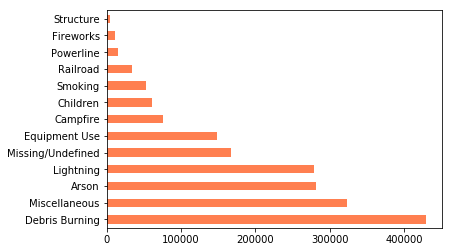

In [0]:
firesDF['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh',color='coral')

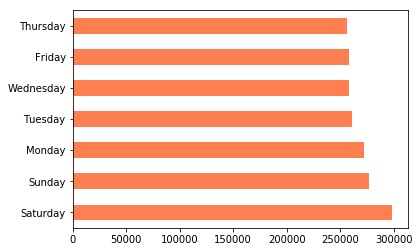

In [0]:
firesDF['DAY_OF_WEEK'].value_counts().plot(kind='barh',color='coral')

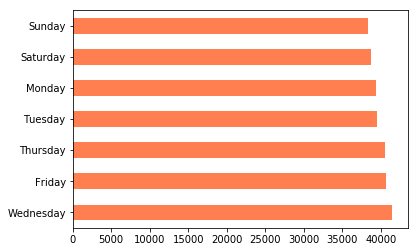

In [0]:
df_lightning = firesDF[firesDF['STAT_CAUSE_DESCR']=='Lightning']
df_lightning['DAY_OF_WEEK'].value_counts().plot(kind='barh',color='coral')

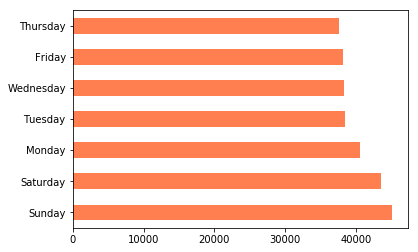

In [0]:
df_arson = firesDF[firesDF['STAT_CAUSE_DESCR']=='Arson']
df_arson['DAY_OF_WEEK'].value_counts().plot(kind='barh',color='coral')

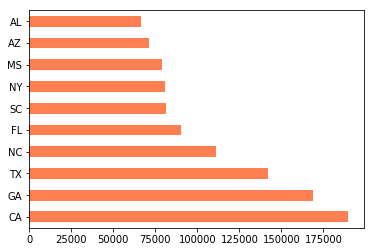

In [0]:
firesDF['STATE'].value_counts().head(n=10).plot(kind='barh',color='coral')

In [0]:
df_CA = firesDF[firesDF['STATE']=='CA']
df_GA = firesDF[firesDF['STATE']=='GA']
df_TX = firesDF[firesDF['STATE']=='TX']

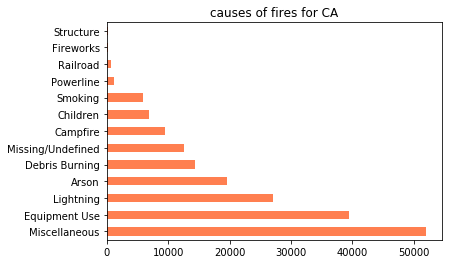

In [0]:
df_CA['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh',color='coral',title='causes of fires for CA')

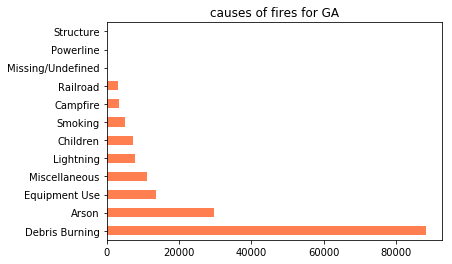

In [0]:
df_GA['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh',color='coral',title='causes of fires for GA')

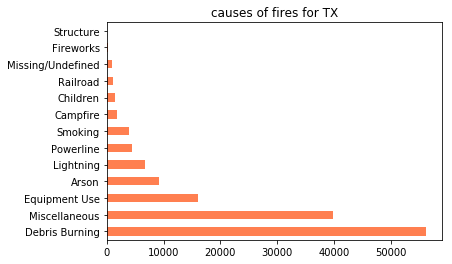

In [0]:
df_TX['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh',color='coral',title='causes of fires for TX')

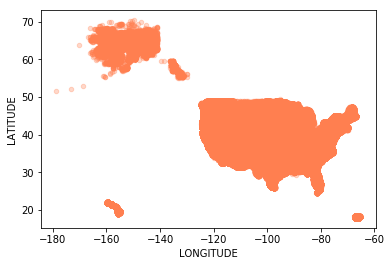

In [0]:
firesDF.plot(kind='scatter',x='LONGITUDE',y='LATITUDE',color='coral',alpha=0.3)

In [0]:
from sklearn import tree, preprocessing
import sklearn.ensemble as ske
from sklearn.model_selection import train_test_split

In [0]:
le = preprocessing.LabelEncoder()
firesDF['STAT_CAUSE_DESCR'] = le.fit_transform(firesDF['STAT_CAUSE_DESCR'])
firesDF['STATE'] = le.fit_transform(firesDF['STATE'])
firesDF['DAY_OF_WEEK'] = le.fit_transform(firesDF['DAY_OF_WEEK'])
print(firesDF.head())

   index  OBJECTID  FOD_ID  ...       DATE MONTH DAY_OF_WEEK
0      0         1       1  ... 2005-02-02     2           6
1      1         2       2  ... 2004-05-12     5           6
2      2         3       3  ... 2004-05-31     5           1
3      3         4       4  ... 2004-06-28     6           1
4      4         5       5  ... 2004-06-28     6           1

[5 rows x 43 columns]


In [0]:
import matplotlib.pyplot as plt

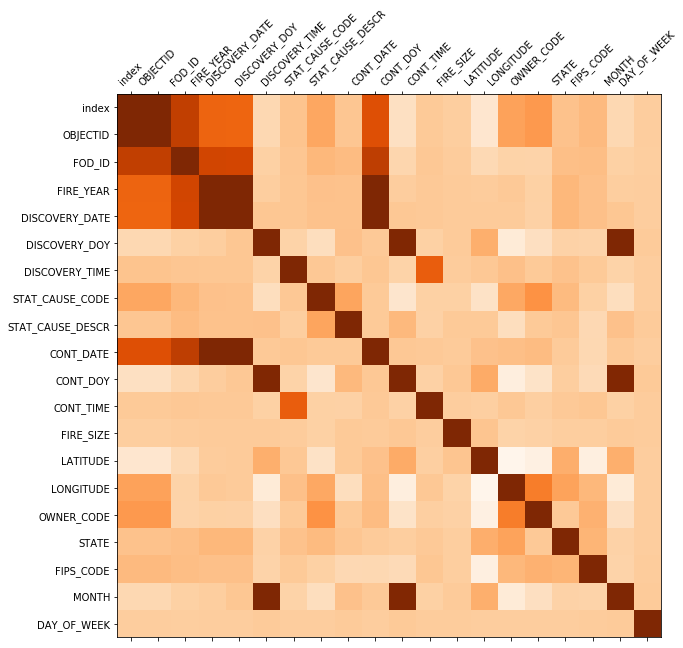

In [0]:
def plot_corr(df,size=10):
    corr = df.corr()  #the default method is pearson
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr,cmap=plt.cm.Oranges)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)    
    plt.show()
    
plot_corr(firesDF)